In [1]:
# Auto_encoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras import layers

# mnist 데이터 불러오기
from keras.datasets import mnist

In [2]:
(x_train,_),(x_test,_) = mnist.load_data() # 이미지만 사용

# 0과 1사이로 정규화
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
print(len(x_train))
print(len(x_test))

60000
10000


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train.shape[1:]

(28, 28)

In [8]:
np.prod(x_train.shape[1:])

784

In [12]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

In [13]:
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [14]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
# Auto_encoder

# encoding 되는 차원의 수
encoding_dim = 32

# input layer
input_img = keras.Input(shape=(784,))

# hidden layer (784 dimensions >> 32 dim)
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# output layer (32 dimensions >> 784 dimensions)
decoded = layers.Dense(784, activation = 'sigmoid')(encoded)

# autoencoder 모델
autoencoder = keras.Model(input_img, decoded)

In [16]:
# auto_encoder 학습
autoencoder.compile(loss = 'binary_crossentropy', optimizer='adam')

# 적합(훈련용 데이터 활용)

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size = 256,
                shuffle=True,
                validation_data = (x_test, x_test))



Epoch 1/20
235/235 [==============================] - 2s 2ms/step - loss: 0.2782 - val_loss: 0.1872
Epoch 2/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1661 - val_loss: 0.1499
Epoch 3/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1320
Epoch 4/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1273 - val_loss: 0.1203
Epoch 5/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1174 - val_loss: 0.1121
Epoch 6/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1103 - val_loss: 0.1062
Epoch 7/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1052 - val_loss: 0.1019
Epoch 8/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1015 - val_loss: 0.0987
Epoch 9/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0989 - val_loss: 0.0967
Epoch 10/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0972 - val_loss: 0.0953

In [17]:
# 학습결과 확인
decoded_img = autoencoder.predict(x_test)


313/313 [==============================] - 0s 510us/step


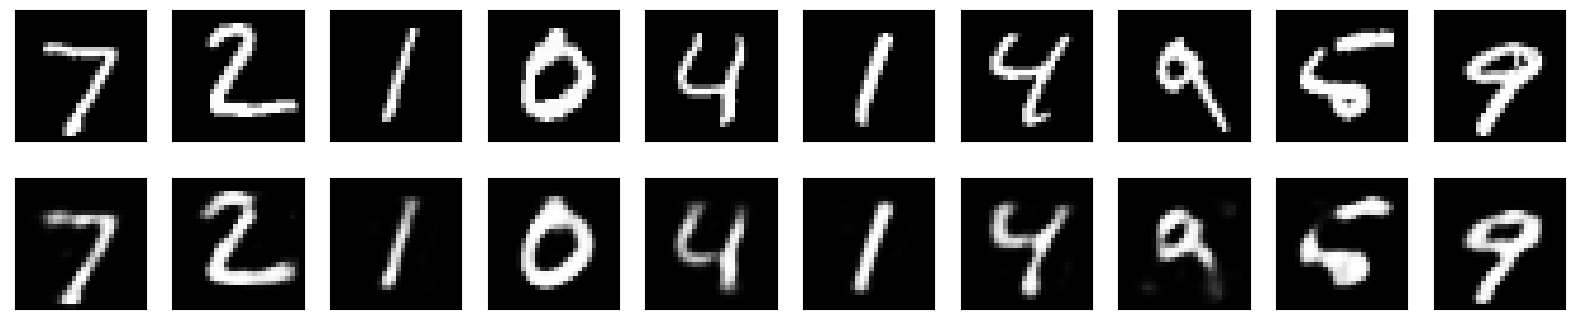

In [19]:
n = 10 # 보여주고싶은 그림의 수

plt.figure(figsize = (20, 4))
for i in range(n) :
    # 원래 이미지
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # decoded 이미지
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()